In [1]:
import pandas as pd
import numpy as np
import json
import os
import matplotlib
import matplotlib.pyplot as plt

In [53]:
filename_list = []
# # Define the directory path
directory = "D:\Python\Resume_NLP_Project\Resume-Strength-NLP-Project\Dataset"

# Iterate over each file in the directory
for filename in os.listdir(directory):
    # Check if the file is a regular file and its name starts with "Tags"
    if os.path.isfile(os.path.join(directory, filename)) and filename.startswith("Job_Details"):
        # Process the file
        filename_list.append(filename)
print(filename_list)

['Job_Details_Big_Data.json', 'Job_Details_Computer_Vision.json', 'Job_Details_Data_Analyst.json', 'Job_Details_Data_Architect.json', 'Job_Details_Data_Science.json', 'Job_Details_Data_Visualization.json', 'Job_Details_Deep_Learning.json', 'Job_Details_Engineering.json', 'Job_Details_Machine_Learning.json', 'Job_Details_ML_Ops.json', 'Job_Details_NLP.json', 'Job_Details_Research.json']


In [54]:
df_Description = pd.read_json(f'D:\Python\Resume_NLP_Project\Resume-Strength-NLP-Project\Dataset\{filename_list[0]}')
df_Description

,Job_name,Company Name,Location,Type,Level,Pay,Job Link
0,"Scientist/Senior Scientist, Computational Biol...",Altos Labs,"Cambridge, UK",Full Time,Senior-level,GBP 51K - 130K,https://ai-jobs.net/J45148/apply/
1,Senior Big Data Software Engineer,NielsenIQ,"Petach Tikva, Israel",Full Time,Senior-level,USD 55K - 102K *,https://ai-jobs.net/J45109/apply/
2,"Senior Scientist, Computational Biology","Flagship Pioneering, Inc.","Cambridge, MA USA",Full Time,Senior-level,USD 69K - 128K *,https://ai-jobs.net/J45149/apply/
3,Senior Java Software Developer with focus on B...,Dynatrace,"Linz, Vienna, Hagenberg, Austria",Full Time,Senior-level,EUR 56K+,https://ai-jobs.net/J45078/apply/
4,Business Intelligence Developer,Definitive Logic,"Arlington, VA",Full Time,USD 63K - 117K *,Definitive Logic,https://ai-jobs.net/J45052/apply/
...,...,...,...,...,...,...,...
328,Data Engineer (Senior Solution Designer) for B...,Deutsche Telekom IT Solutions Slovakia,"Košice, Slovakia (Slovak Republic)",Full Time,Senior-level,USD 115K - 180K *,https://ai-jobs.net/J40312/apply/
329,"Senior Scientist, Computational Biology","Flagship Pioneering, Inc.",Cambridge,Full Time,Senior-level,USD 62K - 115K *,https://ai-jobs.net/J40259/apply/
330,"Data Analyst, Partner Development - (Statistic...",Agoda,Bangkok,Full Time,Senior-level,USD 92K - 130K *,https://ai-jobs.net/J40252/apply/
331,BI Analyst/ Senior Analyst (SOAP) (Bangkok-bas...,Agoda,Bangkok,Full Time,Senior-level,USD 48K - 78K *,https://ai-jobs.net/J40260/apply/


In [55]:
import re

for i in range(len(df_Description)):
    result = re.sub('[a-zA-Z* ]', '', df_Description['Pay'].to_numpy()[i])
    df_Description['Pay'][i] = result

for i in range(len(df_Description)):
    result = re.search(r'\d+', df_Description['Pay'].to_numpy()[i])
    if result:
        pass
    else:
        df_Description['Pay'][i] = 'Nan'

In [56]:
len(df_Description[df_Description['Pay'].to_numpy()==0])

0

In [57]:
df_Description['Pay'].to_numpy()

array(['51-130', '55-102', '69-128', '56+', 'Nan', '55-102', '55-102',
       '48-90', '55-102', '210+', '30-60', '70-148', '115-180', '45-100',
       '69-128', '150-249', '110-184', '62-115', '62-115', '39-73',
       '30-60', '200-215', '92-130', '39-73', '56-105', '30-60', '48-78',
       '62-115', '44-81', '55-102', '129-185', '62-115', '48-78',
       '62-115', '92-130', '62-115', '44-81', '92-130', '129-185',
       '62-115', '63-250', '210+', '55-102', '39-73', '69-128', '69-128',
       'Nan', '48-78', 'Nan', 'Nan', 'Nan', '92-130', '55-102', '106-167',
       '55-102', '51-94', 'Nan', '92-130', '35-65', '45-84', '111-150',
       '62-115', '44-81', '62-115', 'Nan', '65-121', 'Nan', '39-73',
       'Nan', '51-94', '91+', '55-102', '115-180', '30-60', '44-81',
       '55-102', '69-128', '3', '62-115', '62-115', '92-130', '62-115',
       '73-120', '62-115', '135-195', '129-185', '69-128', '30-60',
       '30-60', '20/20.', '69-128', '62-115', '48-78', '69-128', '30-60',
       

In [58]:
salary_list = []
for i in range(len(df_Description)):
    if '-' in df_Description['Pay'].to_numpy()[i]:
        string = df_Description['Pay'].to_numpy()[i]
        result = string.split("-")

        num1 = int(result[0])
        num2 = int(result[1])

        avg = (num1+num2)/2
        salary_list.append(avg)
        
    elif '+' in df_Description['Pay'].to_numpy()[i]:
        num = int(df_Description['Pay'].to_numpy()[i].replace('+',''))
        salary_list.append(num)
        
    else:
        salary_list.append(np.nan)       
salary_list

[90.5,
 78.5,
 98.5,
 56,
 nan,
 78.5,
 78.5,
 69.0,
 78.5,
 210,
 45.0,
 109.0,
 147.5,
 72.5,
 98.5,
 199.5,
 147.0,
 88.5,
 88.5,
 56.0,
 45.0,
 207.5,
 111.0,
 56.0,
 80.5,
 45.0,
 63.0,
 88.5,
 62.5,
 78.5,
 157.0,
 88.5,
 63.0,
 88.5,
 111.0,
 88.5,
 62.5,
 111.0,
 157.0,
 88.5,
 156.5,
 210,
 78.5,
 56.0,
 98.5,
 98.5,
 nan,
 63.0,
 nan,
 nan,
 nan,
 111.0,
 78.5,
 136.5,
 78.5,
 72.5,
 nan,
 111.0,
 50.0,
 64.5,
 130.5,
 88.5,
 62.5,
 88.5,
 nan,
 93.0,
 nan,
 56.0,
 nan,
 72.5,
 91,
 78.5,
 147.5,
 45.0,
 62.5,
 78.5,
 98.5,
 nan,
 88.5,
 88.5,
 111.0,
 88.5,
 96.5,
 88.5,
 165.0,
 157.0,
 98.5,
 45.0,
 45.0,
 nan,
 98.5,
 88.5,
 63.0,
 98.5,
 45.0,
 111.0,
 98.5,
 111.0,
 nan,
 88.5,
 64.5,
 88.5,
 88.5,
 88.5,
 88.5,
 147.5,
 78.5,
 98.5,
 166.0,
 63.0,
 98.0,
 150.0,
 88.5,
 88.5,
 78.5,
 88.5,
 111.0,
 64.5,
 53.0,
 72.5,
 56.0,
 147.5,
 50.0,
 78.5,
 62.5,
 nan,
 56.0,
 98.5,
 78.5,
 nan,
 78.5,
 45.0,
 62.5,
 nan,
 98.5,
 63.0,
 245.0,
 88.5,
 78.5,
 nan,
 nan,
 88.5,
 8

In [59]:
df_Description['Average Salary ($1000)'] = salary_list

In [60]:
df_Description

,Job_name,Company Name,Location,Type,Level,Pay,Job Link,Average Salary ($1000)
0,"Scientist/Senior Scientist, Computational Biol...",Altos Labs,"Cambridge, UK",Full Time,Senior-level,51-130,https://ai-jobs.net/J45148/apply/,90.5
1,Senior Big Data Software Engineer,NielsenIQ,"Petach Tikva, Israel",Full Time,Senior-level,55-102,https://ai-jobs.net/J45109/apply/,78.5
2,"Senior Scientist, Computational Biology","Flagship Pioneering, Inc.","Cambridge, MA USA",Full Time,Senior-level,69-128,https://ai-jobs.net/J45149/apply/,98.5
3,Senior Java Software Developer with focus on B...,Dynatrace,"Linz, Vienna, Hagenberg, Austria",Full Time,Senior-level,56+,https://ai-jobs.net/J45078/apply/,56.0
4,Business Intelligence Developer,Definitive Logic,"Arlington, VA",Full Time,USD 63K - 117K *,Nan,https://ai-jobs.net/J45052/apply/,NaN
...,...,...,...,...,...,...,...,...
328,Data Engineer (Senior Solution Designer) for B...,Deutsche Telekom IT Solutions Slovakia,"Košice, Slovakia (Slovak Republic)",Full Time,Senior-level,115-180,https://ai-jobs.net/J40312/apply/,147.5
329,"Senior Scientist, Computational Biology","Flagship Pioneering, Inc.",Cambridge,Full Time,Senior-level,62-115,https://ai-jobs.net/J40259/apply/,88.5
330,"Data Analyst, Partner Development - (Statistic...",Agoda,Bangkok,Full Time,Senior-level,92-130,https://ai-jobs.net/J40252/apply/,111.0
331,BI Analyst/ Senior Analyst (SOAP) (Bangkok-bas...,Agoda,Bangkok,Full Time,Senior-level,48-78,https://ai-jobs.net/J40260/apply/,63.0


In [61]:
df_Description['Average Salary ($1000)'] = df_Description['Average Salary ($1000)'].fillna(df_Description['Average Salary ($1000)'].mean())

In [62]:
df_Description

,Job_name,Company Name,Location,Type,Level,Pay,Job Link,Average Salary ($1000)
0,"Scientist/Senior Scientist, Computational Biol...",Altos Labs,"Cambridge, UK",Full Time,Senior-level,51-130,https://ai-jobs.net/J45148/apply/,90.500000
1,Senior Big Data Software Engineer,NielsenIQ,"Petach Tikva, Israel",Full Time,Senior-level,55-102,https://ai-jobs.net/J45109/apply/,78.500000
2,"Senior Scientist, Computational Biology","Flagship Pioneering, Inc.","Cambridge, MA USA",Full Time,Senior-level,69-128,https://ai-jobs.net/J45149/apply/,98.500000
3,Senior Java Software Developer with focus on B...,Dynatrace,"Linz, Vienna, Hagenberg, Austria",Full Time,Senior-level,56+,https://ai-jobs.net/J45078/apply/,56.000000
4,Business Intelligence Developer,Definitive Logic,"Arlington, VA",Full Time,USD 63K - 117K *,Nan,https://ai-jobs.net/J45052/apply/,95.342373
...,...,...,...,...,...,...,...,...
328,Data Engineer (Senior Solution Designer) for B...,Deutsche Telekom IT Solutions Slovakia,"Košice, Slovakia (Slovak Republic)",Full Time,Senior-level,115-180,https://ai-jobs.net/J40312/apply/,147.500000
329,"Senior Scientist, Computational Biology","Flagship Pioneering, Inc.",Cambridge,Full Time,Senior-level,62-115,https://ai-jobs.net/J40259/apply/,88.500000
330,"Data Analyst, Partner Development - (Statistic...",Agoda,Bangkok,Full Time,Senior-level,92-130,https://ai-jobs.net/J40252/apply/,111.000000
331,BI Analyst/ Senior Analyst (SOAP) (Bangkok-bas...,Agoda,Bangkok,Full Time,Senior-level,48-78,https://ai-jobs.net/J40260/apply/,63.000000


# Level

In [63]:
df_Description.describe()

,Average Salary ($1000)
count,333.000000
mean,95.342373
std,34.985170
min,43.500000
25%,78.500000
50%,88.500000
75%,109.000000
max,245.000000


In [64]:
Level_list = []
for  i in range(len(df_Description)):
    if 'level' in df_Description['Level'][i]:
        Level_list.append(df_Description['Level'][i])
    else:
        Level_list.append('Senior-level')
Level_list

['Senior-level',
 'Senior-level',
 'Senior-level',
 'Senior-level',
 'Senior-level',
 'Senior-level',
 'Senior-level',
 'Senior-level',
 'Senior-level',
 'Senior-level',
 'Senior-level',
 'Mid-level',
 'Senior-level',
 'Mid-level',
 'Senior-level',
 'Entry-level',
 'Senior-level',
 'Senior-level',
 'Senior-level',
 'Entry-level',
 'Senior-level',
 'Senior-level',
 'Senior-level',
 'Entry-level',
 'Mid-level',
 'Senior-level',
 'Mid-level',
 'Senior-level',
 'Entry-level',
 'Senior-level',
 'Senior-level',
 'Senior-level',
 'Entry-level',
 'Senior-level',
 'Senior-level',
 'Senior-level',
 'Entry-level',
 'Senior-level',
 'Senior-level',
 'Senior-level',
 'Senior-level',
 'Senior-level',
 'Senior-level',
 'Entry-level',
 'Senior-level',
 'Senior-level',
 'Senior-level',
 'Senior-level',
 'Senior-level',
 'Senior-level',
 'Senior-level',
 'Senior-level',
 'Senior-level',
 'Senior-level',
 'Senior-level',
 'Mid-level',
 'Senior-level',
 'Senior-level',
 'Entry-level',
 'Mid-level',
 'Seni

In [65]:
df_Description['Level'] = Level_list

In [66]:
df_Description['Level'].unique()[0]

'Senior-level'

In [67]:
def level_count(x):
    count=0
    for i in range(len(df_Description['Level'])):
        if df_Description['Level'][i] == df_Description['Level'].unique()[x]:
            count+=1
    return count

In [68]:
print(level_count(1))

29


In [69]:
df_Description

,Job_name,Company Name,Location,Type,Level,Pay,Job Link,Average Salary ($1000)
0,"Scientist/Senior Scientist, Computational Biol...",Altos Labs,"Cambridge, UK",Full Time,Senior-level,51-130,https://ai-jobs.net/J45148/apply/,90.500000
1,Senior Big Data Software Engineer,NielsenIQ,"Petach Tikva, Israel",Full Time,Senior-level,55-102,https://ai-jobs.net/J45109/apply/,78.500000
2,"Senior Scientist, Computational Biology","Flagship Pioneering, Inc.","Cambridge, MA USA",Full Time,Senior-level,69-128,https://ai-jobs.net/J45149/apply/,98.500000
3,Senior Java Software Developer with focus on B...,Dynatrace,"Linz, Vienna, Hagenberg, Austria",Full Time,Senior-level,56+,https://ai-jobs.net/J45078/apply/,56.000000
4,Business Intelligence Developer,Definitive Logic,"Arlington, VA",Full Time,Senior-level,Nan,https://ai-jobs.net/J45052/apply/,95.342373
...,...,...,...,...,...,...,...,...
328,Data Engineer (Senior Solution Designer) for B...,Deutsche Telekom IT Solutions Slovakia,"Košice, Slovakia (Slovak Republic)",Full Time,Senior-level,115-180,https://ai-jobs.net/J40312/apply/,147.500000
329,"Senior Scientist, Computational Biology","Flagship Pioneering, Inc.",Cambridge,Full Time,Senior-level,62-115,https://ai-jobs.net/J40259/apply/,88.500000
330,"Data Analyst, Partner Development - (Statistic...",Agoda,Bangkok,Full Time,Senior-level,92-130,https://ai-jobs.net/J40252/apply/,111.000000
331,BI Analyst/ Senior Analyst (SOAP) (Bangkok-bas...,Agoda,Bangkok,Full Time,Senior-level,48-78,https://ai-jobs.net/J40260/apply/,63.000000


# Location

57 53 7 2


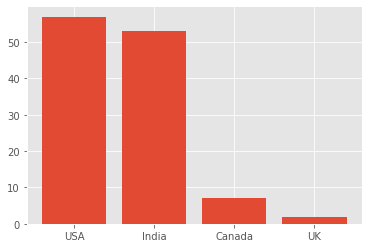

In [106]:
usa_list = []
india_list = []
canada_list = []
uk_list = []
for i in range(len(df_Description)):
    if 'united states' in df_Description['Location'][i].lower():
        usa_list.append(df_Description['Location'][i])
    elif 'usa' in df_Description['Location'][i].lower():
        usa_list.append(df_Description['Location'][i])
    elif 'india' in df_Description['Location'][i].lower():
        india_list.append(df_Description['Location'][i])
    elif 'canada' in df_Description['Location'][i].lower():
        canada_list.append(df_Description['Location'][i])
    elif 'uk' in df_Description['Location'][i].lower():
        uk_list.append(df_Description['Location'][i])
print(len(usa_list),len(india_list),len(canada_list),len(uk_list))

import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.bar(['USA','India','Canada','UK'],height = [len(usa_list),len(india_list),len(canada_list),len(uk_list)])
plt.show()

In [87]:
df_Description['Location'].to_numpy()

array(['Cambridge, UK', 'Petach Tikva, Israel', 'Cambridge, MA USA',
       'Linz, Vienna, Hagenberg, Austria', 'Arlington, VA',
       'Hyderabad, India', 'Bengaluru, India', 'Ebène, Mauritius',
       'Mumbai, India', 'Houston, Texas, United States', 'Framingham, MA',
       'Athens, Attica, Greece', 'Kusterdingen, Germany',
       'Bucharest, Bucharest, Romania - Remote', 'Boston, MA',
       'Boston, MA, United States', 'Stuttgart, Germany', 'Remote',
       'Poznań, Warszawa, Poland', 'Kusterdingen, Germany',
       'Melbourne, Australia', 'Kirkland, WA, United States',
       'Bengaluru, India', 'Kusterdingen, Germany',
       'Columbia, Maryland, United States', 'Islamabad, Pakistan',
       'Sofia, Sofia City Province, Bulgaria', 'Poznan',
       'New York City, United States', 'Pune, India',
       'San Francisco, CA, United States', 'Köln, Germany',
       'Gibraltar, Gibraltar', 'London, United Kingdom', 'Bangkok',
       'Austin, TX, United States', 'New York City, United S

In [85]:
x = 'OEUFB'
x.lower()

'oeufb'